In [1]:
import glob
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import rocks
import time as t

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import angular_separation

import seaborn as sns
sns.set_context('talk')

In [2]:
def read_bft(path):
    cols = [
        'sso_number', 
        'orbital_elements.semi_major_axis.value', 
        'orbital_elements.eccentricity.value', 
        'orbital_elements.inclination.value', 
        'orbital_elements.node_longitude.value',
        'absolute_magnitude.value', 
        'diameter.value', 
        'mass.value', 
        'taxonomy.class', 
        'phase_functions.Generic/Johnson.V.H.value',
        'phase_functions.Generic/Johnson.V.G1.value',
        'phase_functions.Generic/Johnson.V.G2.value',
        'sso_class'
    ]
    
    for ks in ['1','2','3','4']:
        cols.append(f'spins.{ks}.RA0.value')
        cols.append(f'spins.{ks}.DEC0.value')
    
    bft = pd.read_parquet(path, columns=cols)
    
    return bft

In [3]:
bft_file = '/home/peloton/Downloads/ssoBFT-latest.parquet'

raw = pd.read_parquet('data/sso_bft_50_inf_hg1g2spins.parquet')

names_numbers = rocks.identify(raw.ssnamenr)
raw['ssnamenr'] = [str(name_number[1]) for name_number in names_numbers]

print(len(raw))

# Merge with BFT
pdf_bft = read_bft(bft_file)
pdf_bft = pdf_bft.rename(columns={'sso_number': 'ssnamenr'})
mask = pdf_bft['ssnamenr'].apply(lambda x: x == x)
pdf_bft = pdf_bft[mask]
pdf_bft['ssnamenr'] = pdf_bft['ssnamenr'].apply(lambda x: str(int(x)))

data = raw.merge(pdf_bft, on='ssnamenr')
print(len(data))

WARNING  [rocks] Could not find match for id 2016 QP01.

WARNING  [rocks] Could not find match for id 2019 AQ03.

WARNING  [rocks] Could not find match for id 2002 TA09.

WARNING  [rocks] Could not find match for id 2020 OL03.

WARNING  [rocks] Could not find match for id 2016 XB07.

WARNING  [rocks] Could not find match for id 2020 KU04.

WARNING  [rocks] Could not find match for id 2003 VA03.

WARNING  [rocks] Could not find match for id 2015 JO05.

WARNING  [rocks] Could not find match for id 2014 RH00.

WARNING  [rocks] Could not find match for id 2015 MO01.

WARNING  [rocks] Could not find match for id 2016 WQ05.

WARNING  [rocks] Could not find match for id 2013 PY06.

WARNING  [rocks] Could not find match for id 2014 RP00.

WARNING  [rocks] Could not find match for id 2003 RK07.

WARNING  [rocks] Could not find match for id 2020 VF01.

WARNING  [rocks] Could not find match for id 2007 OR01.

WARNING  [rocks] Could not find match for id 1998 UQ01.

WARNING  [rocks] Could not find match for id 2008 YF02.

WARNING  [rocks] Could not find match for id 2015 WV01.

WARNING  [rocks] Could not find match for id 2013 WJ00.

WARNING  [rocks] Could not find match for id 2020 ML03.

WARNING  [rocks] Could not find match for id 2001 RD02.

WARNING  [rocks] Could not find match for id 2003 YM01.

WARNING  [rocks] Could not find match for id 2014 KL05.

WARNING  [rocks] Could not find match for id 2011 LZ05.

WARNING  [rocks] Could not find match for id 2009 CD04.

WARNING  [rocks] Could not find match for id 162P.

WARNING  [rocks] Could not find match for id 2002 GZ08.

WARNING  [rocks] Could not find match for id 1999 UK05.

WARNING  [rocks] Could not find match for id 2012 UA00.

WARNING  [rocks] Could not find match for id 2016 OQ02.

WARNING  [rocks] Could not find match for id 2016 VM04.

WARNING  [rocks] Could not find match for id 2017 YH03.

WARNING  [rocks] Could not find match for id 2009 CC03.

WARNING  [rocks] Could not find match for id 2002 NS07.

WARNING  [rocks] Could not find match for id 2010 WQ07.

WARNING  [rocks] Could not find match for id 2010 LS00.

WARNING  [rocks] Could not find match for id 2003 UR00.

WARNING  [rocks] Could not find match for id 2020 FW03.

WARNING  [rocks] Could not find match for id 2007 TG08.

WARNING  [rocks] Could not find match for id 2007 AS01.

WARNING  [rocks] Could not find match for id 2020 PC05.

WARNING  [rocks] Could not find match for id 2020 KJ06.

WARNING  [rocks] Could not find match for id 2013 XE04.

WARNING  [rocks] Could not find match for id 28P.

WARNING  [rocks] Could not find match for id 2009 PA09.

WARNING  [rocks] Could not find match for id 2016 OK00.

WARNING  [rocks] Could not find match for id 2020 PD01.

WARNING  [rocks] Could not find match for id 2020 OW03.

WARNING  [rocks] Could not find match for id 2020 JQ00.

WARNING  [rocks] Could not find match for id 2004 XM00.

WARNING  [rocks] Could not find match for id 2003 NM03.

WARNING  [rocks] Could not find match for id 2011 AJ05.

WARNING  [rocks] Could not find match for id 2020 KZ05.

WARNING  [rocks] Could not find match for id 2001 YU03.

WARNING  [rocks] Could not find match for id 2007 NX01.

WARNING  [rocks] Could not find match for id 2003 VD01.

WARNING  [rocks] Could not find match for id 2016 XE01.

WARNING  [rocks] Could not find match for id 2008 TE07.

WARNING  [rocks] Could not find match for id 2004 MJ03.

WARNING  [rocks] Could not find match for id 2017 RM00.

WARNING  [rocks] Could not find match for id 2007 UT07.

WARNING  [rocks] Could not find match for id 2006 QB03.

WARNING  [rocks] Could not find match for id 2021 NX07.

WARNING  [rocks] Could not find match for id 2021 LK02.

WARNING  [rocks] Could not find match for id 2020 NA00.

WARNING  [rocks] Could not find match for id 2002 XZ04.

WARNING  [rocks] Could not find match for id 2018 XV05.

WARNING  [rocks] Could not find match for id 2018 KG02.

WARNING  [rocks] Could not find match for id 2011 YQ04.

WARNING  [rocks] Could not find match for id 2018 LM04.

WARNING  [rocks] Could not find match for id 2001 BO02.

WARNING  [rocks] Could not find match for id 2016 VW01.

WARNING  [rocks] Could not find match for id 2012 LV07.

WARNING  [rocks] Could not find match for id 2020 AV02.

WARNING  [rocks] Could not find match for id 2017 LO01.

WARNING  [rocks] Could not find match for id 2007 LX00.

104242
104005


In [4]:
data.columns

Index(['ssnamenr', 'nmeasurements', 'ndays', 'params',
       'orbital_elements.semi_major_axis.value',
       'orbital_elements.eccentricity.value',
       'orbital_elements.inclination.value',
       'orbital_elements.node_longitude.value', 'absolute_magnitude.value',
       'diameter.value', 'mass.value', 'taxonomy.class',
       'phase_functions.Generic/Johnson.V.H.value',
       'phase_functions.Generic/Johnson.V.G1.value',
       'phase_functions.Generic/Johnson.V.G2.value', 'sso_class',
       'spins.1.RA0.value', 'spins.1.DEC0.value', 'spins.2.RA0.value',
       'spins.2.DEC0.value', 'spins.3.RA0.value', 'spins.3.DEC0.value',
       'spins.4.RA0.value', 'spins.4.DEC0.value'],
      dtype='object')

In [5]:
data.head(2)

,ssnamenr,nmeasurements,ndays,params,orbital_elements.semi_major_axis.value,orbital_elements.eccentricity.value,orbital_elements.inclination.value,orbital_elements.node_longitude.value,absolute_magnitude.value,diameter.value,...,phase_functions.Generic/Johnson.V.G2.value,sso_class,spins.1.RA0.value,spins.1.DEC0.value,spins.2.RA0.value,spins.2.DEC0.value,spins.3.RA0.value,spins.3.DEC0.value,spins.4.RA0.value,spins.4.DEC0.value
0,3378,163,694.757685,"{'DEC0': -0.7471160292625427, 'G1': 6.17280937...",2.316358,0.091557,8.080142,335.879020,13.68,6.425,...,0.277644,MB>Inner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66214,73,972.951458,"{'DEC0': 0.8825287222862244, 'G1': 1.0, 'G2': ...",2.665729,0.124973,12.537495,116.523092,15.21,5.944,...,NaN,MB>Middle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['ssnamenr', 'nmeasurements', 'ndays', 'params',
       'orbital_elements.semi_major_axis.value',
       'orbital_elements.eccentricity.value',
       'orbital_elements.inclination.value',
       'orbital_elements.node_longitude.value', 'absolute_magnitude.value',
       'diameter.value', 'mass.value', 'taxonomy.class',
       'phase_functions.Generic/Johnson.V.H.value',
       'phase_functions.Generic/Johnson.V.G1.value',
       'phase_functions.Generic/Johnson.V.G2.value', 'sso_class',
       'spins.1.RA0.value', 'spins.1.DEC0.value', 'spins.2.RA0.value',
       'spins.2.DEC0.value', 'spins.3.RA0.value', 'spins.3.DEC0.value',
       'spins.4.RA0.value', 'spins.4.DEC0.value'],
      dtype='object')

In [7]:
data['params'].values[0].keys()

dict_keys(['DEC0', 'G1', 'G2', 'H', 'R', 'RA0', 'chi2red', 'errDEC0', 'errG1', 'errG2', 'errH', 'errR', 'errRA0', 'maxphase', 'minphase', 'rms'])

In [8]:
# Phase function
data['H'] = data['params'].apply(lambda x: x['H']).values
data['dH'] = data['params'].apply(lambda x: x['errH']).values
data['G1'] = data['params'].apply(lambda x: x['G1']).values
data['dG1'] = data['params'].apply(lambda x: x['errG1']).values
data['G2'] = data['params'].apply(lambda x: x['G2']).values
data['dG2'] = data['params'].apply(lambda x: x['errG2']).values

data['minphase'] = np.rad2deg(data['params'].apply(lambda x: x['minphase']).values)
data['maxphase'] = np.rad2deg(data['params'].apply(lambda x: x['maxphase']).values)

# Oblateness
data['R'] = data['params'].apply(lambda x: x['R']).values
data['dR'] = data['params'].apply(lambda x: x['errR']).values

# Coordinates: RA/Dec
data['RA0'] = np.rad2deg(data['params'].apply(lambda x: x['RA0']).values)
# mask = data['RA0'] > 180
# data.loc[mask,'RA0'] = data.loc[mask,'RA0'] -180
data['dRA0'] = np.rad2deg(data['params'].apply(lambda x: x['errRA0']).values)
        
data['DEC0'] = np.rad2deg(data['params'].apply(lambda x: x['DEC0']).values)
# mask = data['DEC0'] < 0
# data.loc[mask,'DEC0'] = -data.loc[mask,'DEC0']
data['dDEC0'] = np.rad2deg(data['params'].apply(lambda x: x['errDEC0']).values)

data['dSpin'] = np.sqrt( data['dRA0']**2 + data['dDEC0']**2 )

# Remove solutions above 90 deg of latitude
cond = data.DEC0 > 90
data.loc[cond,'DEC0'] = 90
cond = data.DEC0 < -90
data.loc[cond,'DEC0'] = -90

# Spin coordinates: long/lat
# Define angle for astropy
ra = data.RA0*u.degree
dec = data.DEC0*u.degree

# Convert to EC and store in the pandas DataFrame
coords = SkyCoord(ra=ra, dec=dec, distance=200*u.parsec, frame='hcrs')
data['lon'] = coords.heliocentricmeanecliptic.lon.value
data['lat'] = coords.heliocentricmeanecliptic.lat.value

# Convergence chi2
data['chi2red'] = data['params'].apply(lambda x: x['chi2red']).values

# Set flavors
# Bronze
mask = data['chi2red'].apply(lambda x: x == x)
mask *= (data['G1'] + data['G2'] <= 1)
data.loc[mask, 'flavor'] = 'bronze'

# Silver
mask = data['H'].apply(lambda x: x == x)
mask *= data['chi2red'] < 20
mask *= data['RA0']/data['dRA0'] >= 1
mask *= np.abs(data['DEC0']/data['dDEC0']) >= 1
mask *= data['R']/data['dR'] >= 1
mask *= (data['G1'] + data['G2'] <= 1)
data.loc[mask,'flavor'] = 'silver'

# Gold
mask = data['H'].apply(lambda x: x == x)
mask *= (data['chi2red'] < 1.5) * (data['chi2red'] > 0.5)
mask *= data['RA0']/data['dRA0'] >= 3
mask *= np.abs(data['DEC0']/data['dDEC0']) >= 3
mask *= data['R']/data['dR'] >= 3
mask *= (data['G1'] + data['G2'] <= 1)
data.loc[mask,'flavor'] = 'gold'

In [9]:
count = 0
for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    print('Number of observations for {:7s}: {:,}/{:,}'.format(flavor, len(data[cond]), len(data)))
    count += len(data[cond])
print('{:,} with spins'.format(count))
print('{:,} rejected'.format(len(data) - count))

Number of observations for gold   : 1,625/104,005
Number of observations for silver : 19,708/104,005
Number of observations for bronze : 66,066/104,005
87,399 with spins
16,606 rejected


In [10]:
print('Total: {:,}'.format(len(data)))

mask = (data['H'] == data['H'])
print('With fit: {:,}'.format(len(data[mask])))

mask = (data['G1'] + data['G2'] <= 1)
print('Physical: {:,}'.format(len(data[mask])))

Total: 104,005
With fit: 103,164
Physical: 87,399


### Extract SSO name

In [11]:
t0 = t.time()
names_numbers = rocks.identify(data.ssnamenr)

# Add numbers and names to data
data["name"] = [name_number[0] for name_number in names_numbers]
data["number"] = [name_number[1] for name_number in names_numbers]

t1 = t.time()
print(f'Time for identification: {t1-t0:.1f}s')

Time for identification: 3.8s


In [12]:
data.head(2)

,ssnamenr,nmeasurements,ndays,params,orbital_elements.semi_major_axis.value,orbital_elements.eccentricity.value,orbital_elements.inclination.value,orbital_elements.node_longitude.value,absolute_magnitude.value,diameter.value,...,dRA0,DEC0,dDEC0,dSpin,lon,lat,chi2red,flavor,name,number
0,3378,163,694.757685,"{'DEC0': -0.7471160292625427, 'G1': 6.17280937...",2.316358,0.091557,8.080142,335.879020,13.68,6.425,...,42.093035,-42.806595,52.755503,67.490494,214.506998,-32.194516,3.145355,bronze,Susanvictoria,3378
1,66214,73,972.951458,"{'DEC0': 0.8825287222862244, 'G1': 1.0, 'G2': ...",2.665729,0.124973,12.537495,116.523092,15.21,5.944,...,52.072590,50.565171,70.827320,87.909408,164.669445,50.216143,2.204109,NaN,1999 CO36,66214


## Basic statistics

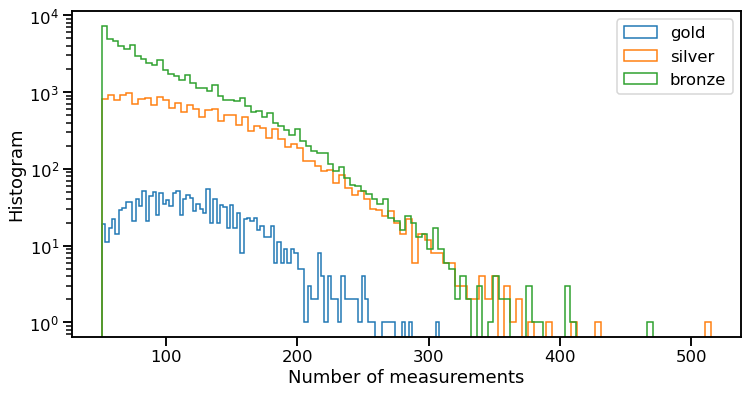

In [13]:
fig = plt.figure(figsize=(12, 6))

for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    plt.hist(data.loc[cond, 'nmeasurements'], bins=100, histtype='step', label=flavor);
plt.xlabel('Number of measurements')
plt.ylabel('Histogram')
plt.yscale('log')
plt.legend();
fig.savefig('plots/nmeasurements.png', facecolor='white', dpi=150)

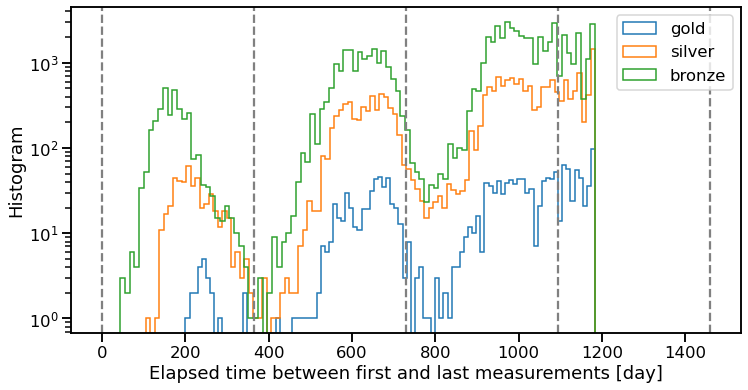

In [14]:
fig = plt.figure(figsize=(12, 6))

for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    plt.hist(data.loc[cond, 'ndays'], bins=100, histtype='step', label=flavor);
plt.xlabel('Elapsed time between first and last measurements [day]')
plt.ylabel('Histogram');
plt.legend()
for i in range(5):
    plt.axvline(365*i, ls='--', color='grey')
plt.yscale('log')
fig.savefig('plots/time_lapse.png', facecolor='white', dpi=150)

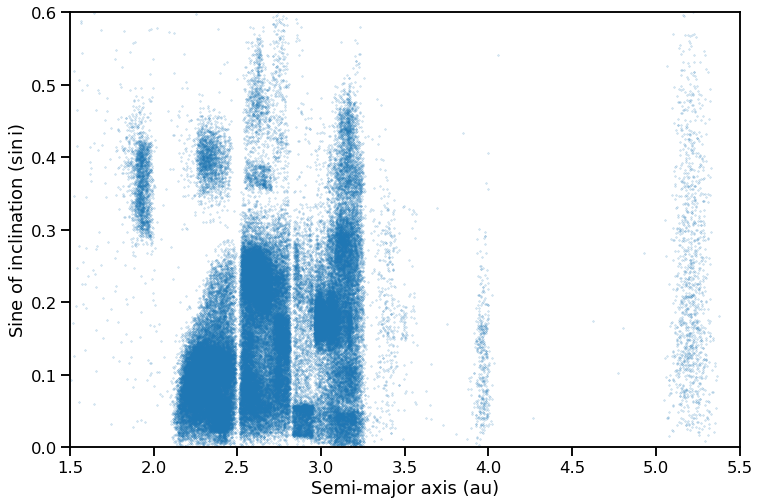

In [15]:
Is = data['orbital_elements.inclination.value']
As = data['orbital_elements.semi_major_axis.value']
Es = data['orbital_elements.eccentricity.value']

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(As, np.sin(np.radians(Is)), marker='.', alpha=0.4, s=1);

# # Mean-motion resonances
# mmr = pd.read_csv('../noconstraints/mmr.csv')
# for i in range(len(mmr)):
#     ax.axvline( mmr.loc[i,'a'], ls='--', color='grey')
#     ax.text( mmr.loc[i,'a']-0.075, 0.55, mmr.loc[i,'mmr'], rotation=90, color='grey')

# # Nu6 secular resonance
# nu6 = pd.read_csv('../noconstraints/nu6.csv')
# ax.plot( nu6.a, np.sin(np.radians(nu6.i)), ls='--', color='grey')

# WHY 0.04 sine(inclination)?
# plt.axhline(0.04, ls='--', color='grey')

ax.set_xlim(1.5,5.5)
ax.set_ylim(0, 0.6)
ax.set_xlabel('Semi-major axis (au)')
ax.set_ylabel(r'Sine of inclination ($\sin$i)')

fig.savefig('plots/types.png', facecolor='white', dpi=150)

In [16]:
data['sso_class'].value_counts()

MB>Middle             35384
MB>Inner              33246
MB>Outer              28455
Hungaria               1818
Phocaea                1481
Trojan                 1231
Mars-Crosser           1141
MB>Cybele               474
MB>Hilda                435
NEA>Apollo              158
NEA>Amor                132
NEA>Aten                 22
Centaur                   7
KBO>SDO                   7
KBO>Resonant>3:2          4
KBO>Classical>Main        4
KBO>Detached              2
KBO>Resonant>7:4          2
NEA>Atira                 1
KBO>Resonant>11:6         1
Name: sso_class, dtype: int64

## Phase curve

### Phase

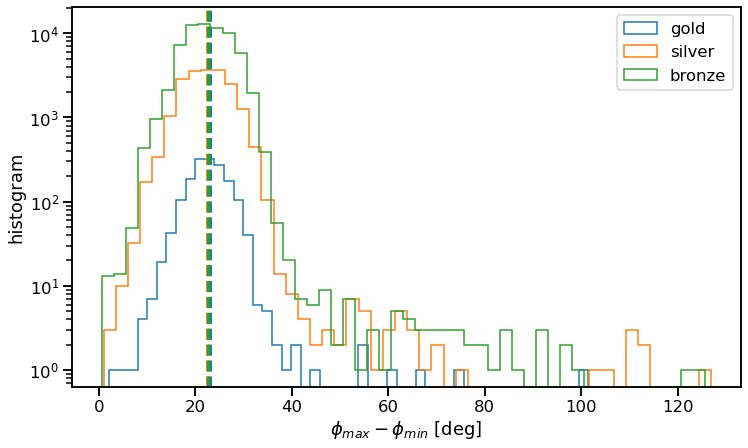

In [17]:
fig = plt.figure(figsize=(12, 7))

for index, flavor in enumerate(['gold', 'silver', 'bronze']):
    cond = data.flavor == flavor
    
    d_ = data.loc[cond,'maxphase'] - data.loc[cond,'minphase']

    plt.hist(d_, bins=50, histtype='step', density=False, label=flavor, color='C{}'.format(index))
    plt.axvline(np.mean(d_), ls='--', lw=3, color='C{}'.format(index))
    plt.xlabel(r'$\phi_{max} - \phi_{min}$ [deg]')
    plt.ylabel('histogram')
    plt.legend()
plt.yscale('log')
plt.show()
fig.savefig('plots/phase_amplitude.png', facecolor='white', dpi=150)

In [18]:
# filt = (data['maxphase'] - data['minphase']) > 100
# data[filt]

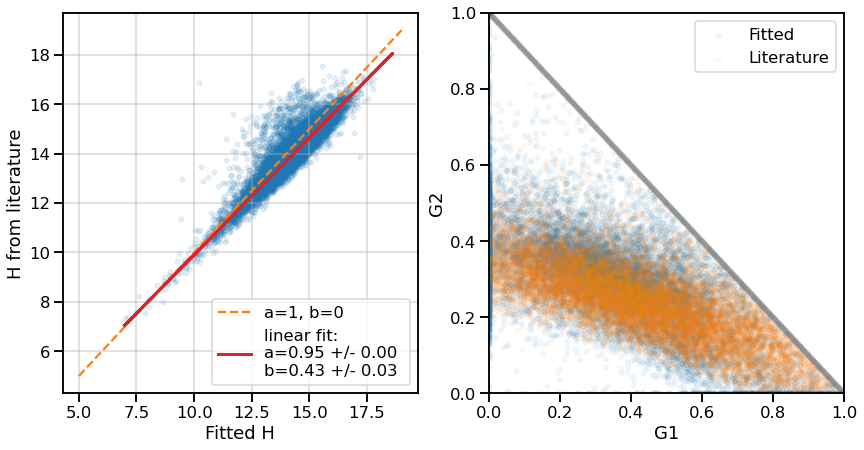

In [19]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a * x + b

yaxis = data['phase_functions.Generic/Johnson.V.H.value'].values
mask = yaxis == yaxis
mask *= data['flavor'] == 'silver'

xaxis = data['H'].values[mask]
yaxis = yaxis[mask]
err = data['dH'].values[mask]

popt, pcov = curve_fit(linear, xaxis, yaxis, sigma=err)
perr = np.sqrt(np.diagonal(pcov))
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].scatter(
    xaxis,
    yaxis,
    marker='.',
    alpha=0.1
)
ax[0].plot(
    range(5, 20), 
    range(5, 20), 
    color='C1', ls='--', label='a=1, b=0'
)
ax[0].plot(
    xaxis, 
    linear(xaxis, *popt), 
    label='linear fit: \na={:.2f} +/- {:.2f} \nb={:.2f} +/- {:.2f}'.format(popt[0], perr[0], popt[1], perr[1]),
    color='C3',
    lw=3
)
ax[0].set_xlabel('Fitted H')
ax[0].set_ylabel('H from literature')
ax[0].legend()
ax[0].grid(alpha=0.5)

def triangle(x, r):
    return r - x

ax[1].scatter(
    data.loc[mask,'G1'], 
    data.loc[mask,'G2'], 
    alpha=0.05, 
    marker='.',
    label='Fitted'
)
ax[1].scatter(
    data.loc[mask,'phase_functions.Generic/Johnson.V.G1.value'], 
    data.loc[mask,'phase_functions.Generic/Johnson.V.G2.value'], 
    alpha=0.05, 
    marker='.',
    label='Literature'
)
    
xr = np.arange(0, 1, 0.001)
ax[1].scatter(xr, triangle(xr, 1.), color='grey', marker='.', alpha=0.1)
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel('G1')
ax[1].set_ylabel('G2')
ax[1].legend()
fig.savefig('plots/hg1g2.png', facecolor='white', dpi=150)

### Goodness of fit

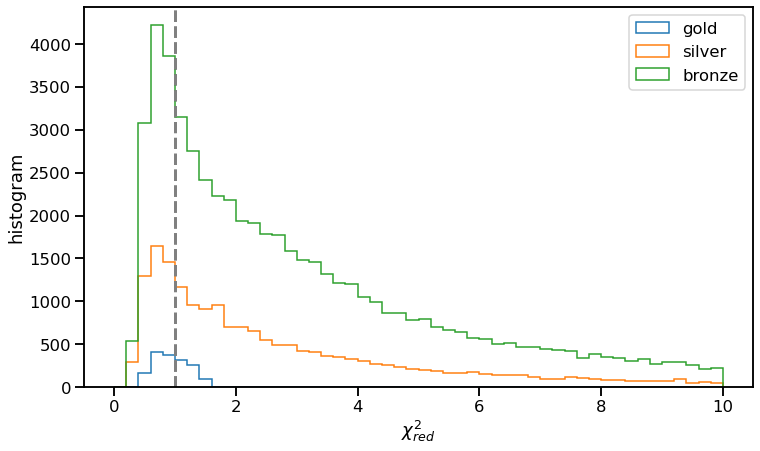

In [20]:
fig = plt.figure(figsize=(12, 7))

for flavor in ['gold', 'silver', 'bronze']:
    cond = data['flavor'] == flavor

    plt.hist(data.loc[cond,'chi2red'], bins=50, histtype='step', density=False, range=[0,10], label=flavor)
    plt.axvline(1, ls='--', color='grey', lw=3)
    plt.xlabel(r'$\chi^2_{red}$')
    plt.ylabel('histogram')
    plt.legend()
plt.show()
fig.savefig('plots/chi2.png', facecolor='white', dpi=150)

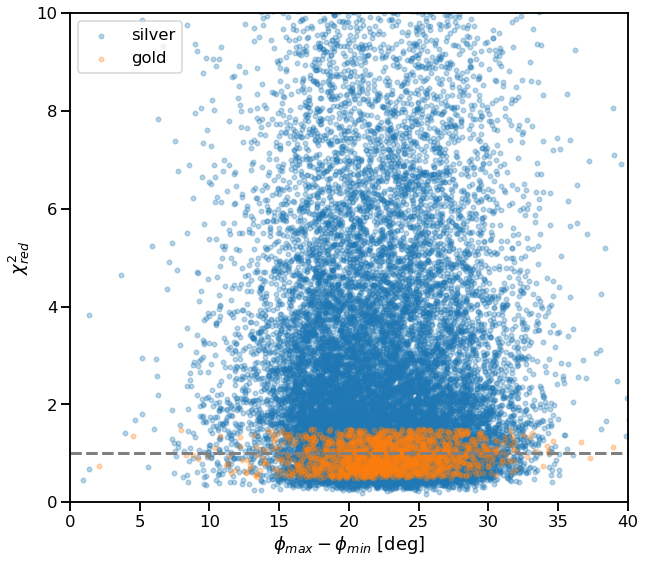

In [21]:
fig = plt.figure(figsize=(10, 9))

for flavor in ['silver', 'gold']:
    cond = data['flavor'] == flavor
    
    d_1 = data.loc[cond,'maxphase'] - data.loc[cond,'minphase']
#     d_1 = data.loc[cond,'ndays']
    d_2 = data.loc[cond,'chi2red']

    plt.scatter(
        d_1,
        d_2,
        marker='.',
        alpha=0.3,
        label=flavor,
    )
    plt.axhline(1, ls='--', color='grey', lw=3)
    plt.xlabel(r'$\phi_{max} - \phi_{min}$ [deg]')
    plt.ylabel(r'$\chi^2_{red}$')
    plt.legend()

plt.xlim([0, 40])
plt.ylim([0, 10])
plt.show()

Interesting -- the chi2 value does not depend on the phase range.

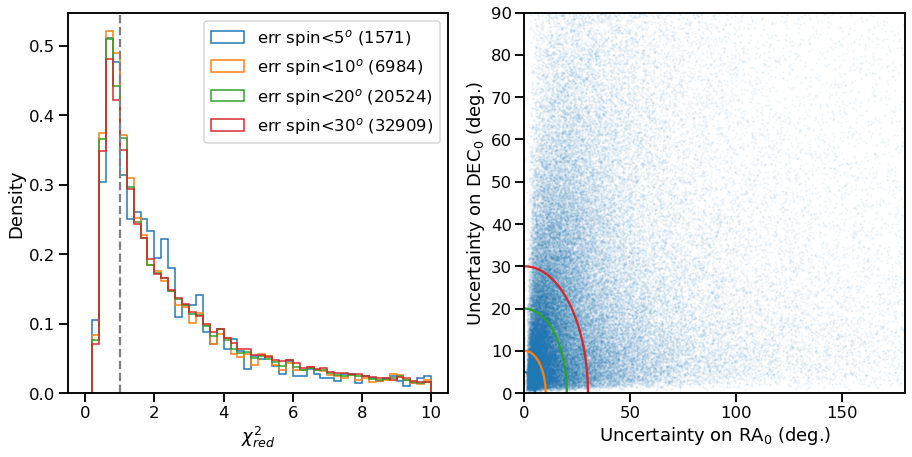

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))


for err in [5,10,20,30]:
    cond = data.dSpin<=err
    ax[0].hist(data.loc[cond,'chi2red'], bins=50, histtype='step', density=True, range=[0,10], label=f'err spin<{err:d}$^o$ ({len(data[cond])})')

    theta = np.linspace(0, np.pi/2, num=90 )
    ax[1].plot( err*np.cos(theta), err*np.sin(theta) )
    
    
    
ax[0].axvline(1, ls='--', color='grey')
ax[0].set_xlabel(r'$\chi^2_{red}$')
ax[0].set_ylabel('Density')
ax[0].legend()


ax[1].scatter( data.dRA0, data.dDEC0,s=1, alpha=0.05 )
ax[1].set_xlim(0,180)
ax[1].set_ylim(0,90)

ax[1].set_xlabel('Uncertainty on RA$_0$ (deg.)')
ax[1].set_ylabel('Uncertainty on DEC$_0$ (deg.)')

    
fig.savefig('plots/uncertainties_spin.png', facecolor='white', dpi=150)
plt.show()

## Spin distance

In [23]:
# Compute angular distances
spin_version = np.array(['A','B','C',"D"])

for ks in ['1','2','3','4']:
    data[f'spins.{ks}.distance'] = np.nan
    cond = (~data[f'spins.{ks}.RA0.value'].isna())
    
    #------------------------------------------------------------------------------------------
    # A: Original spins
    data.loc[cond,f'spins.{ks}.distance.A'] = data.loc[cond,[f'spins.{ks}.RA0.value',f'spins.{ks}.DEC0.value', 'RA0','DEC0']].apply(
        lambda x: np.degrees(angular_separation( np.radians(x[0]), np.radians(x[1]), np.radians(x[2]), np.radians(x[3]) )) , axis=1
    )
    data.loc[cond,f'spins.{ks}.delta_RA.A'] = (data.loc[cond,f'spins.{ks}.RA0.value']-data.loc[cond,'RA0'] ) * np.cos(np.radians(data.loc[cond,f'spins.{ks}.DEC0.value']))
    data.loc[cond,f'spins.{ks}.delta_DEC.A'] = (data.loc[cond,f'spins.{ks}.DEC0.value']-data.loc[cond,'DEC0'] )

    #------------------------------------------------------------------------------------------
    # B: RA-180
    data.loc[cond,f'spins.{ks}.distance.B'] = data.loc[cond,[f'spins.{ks}.RA0.value',f'spins.{ks}.DEC0.value', 'RA0','DEC0']].apply(
        lambda x: np.degrees(angular_separation( np.radians(x[0]-180), np.radians(x[1]), np.radians(x[2]), np.radians(x[3]) )) , axis=1
    )
    data.loc[cond,f'spins.{ks}.delta_RA.B'] = (data.loc[cond,f'spins.{ks}.RA0.value']-180.0-data.loc[cond,'RA0'] ) * np.cos(np.radians(data.loc[cond,f'spins.{ks}.DEC0.value']))
    data.loc[cond,f'spins.{ks}.delta_DEC.B'] = (data.loc[cond,f'spins.{ks}.DEC0.value']-data.loc[cond,'DEC0'] )

    #------------------------------------------------------------------------------------------
    # C: Flip DEC
    data.loc[cond,f'spins.{ks}.distance.C'] = data.loc[cond,[f'spins.{ks}.RA0.value',f'spins.{ks}.DEC0.value', 'RA0','DEC0']].apply(
        lambda x: np.degrees(angular_separation( np.radians(x[0]), np.radians(-x[1]), np.radians(x[2]), np.radians(x[3]) )) , axis=1
    )
    data.loc[cond,f'spins.{ks}.delta_RA.C'] = (data.loc[cond,f'spins.{ks}.RA0.value']-data.loc[cond,'RA0'] ) * np.cos(np.radians(-data.loc[cond,f'spins.{ks}.DEC0.value']))
    data.loc[cond,f'spins.{ks}.delta_DEC.C'] = (-data.loc[cond,f'spins.{ks}.DEC0.value']-data.loc[cond,'DEC0'] )

    #------------------------------------------------------------------------------------------
    # D: RA-180 & Flip DEC
    data.loc[cond,f'spins.{ks}.distance.D'] = data.loc[cond,[f'spins.{ks}.RA0.value',f'spins.{ks}.DEC0.value', 'RA0','DEC0']].apply(
        lambda x: np.degrees(angular_separation( np.radians(x[0]-180), np.radians(-x[1]), np.radians(x[2]), np.radians(x[3]) )) , axis=1
    )
    data.loc[cond,f'spins.{ks}.delta_RA.D'] = (data.loc[cond,f'spins.{ks}.RA0.value']-180.0-data.loc[cond,'RA0'] ) * np.cos(np.radians(-data.loc[cond,f'spins.{ks}.DEC0.value']))
    data.loc[cond,f'spins.{ks}.delta_DEC.D'] = (-data.loc[cond,f'spins.{ks}.DEC0.value']-data.loc[cond,'DEC0'] )

    #------------------------------------------------------------------------------------------
    # Find minimum distance and keep track of which spin version it is
    data.loc[cond,f'spins.{ks}.closest'] = data.loc[cond, [f'spins.{ks}.distance.A', 
                                                           f'spins.{ks}.distance.B', 
                                                           f'spins.{ks}.distance.C', 
                                                           f'spins.{ks}.distance.D']].apply( lambda x: int(np.argmin(x)), axis=1 )
    data = data.astype({f'spins.{ks}.closest':'Int64'})

    data.loc[cond,f'spins.{ks}.distance'] = data.loc[cond, [f'spins.{ks}.distance.A', 
                                                            f'spins.{ks}.distance.B', 
                                                            f'spins.{ks}.distance.C', 
                                                            f'spins.{ks}.distance.D']].apply( lambda x: np.min(x), axis=1 )
    data.loc[cond,f'spins.{ks}.version'] = data.loc[cond, [f'spins.{ks}.distance.A', 
                                                           f'spins.{ks}.distance.B', 
                                                           f'spins.{ks}.distance.C', 
                                                           f'spins.{ks}.distance.D']].apply( lambda x: spin_version[np.argmin(x)], axis=1 )

    #------------------------------------------------------------------------------------------
    # Find minimum distance and keep track of which spin version it is
    data.loc[cond,f'spins.{ks}.delta_RA'] = data.loc[cond, [f'spins.{ks}.delta_RA.A',
                                                            f'spins.{ks}.delta_RA.B',
                                                            f'spins.{ks}.delta_RA.C',
                                                            f'spins.{ks}.delta_RA.D', 
                                                            f'spins.{ks}.closest']].apply( lambda x: x[int(x[4])], axis=1 )
    data.loc[cond,f'spins.{ks}.delta_DEC'] = data.loc[cond, [f'spins.{ks}.delta_DEC.A',
                                                             f'spins.{ks}.delta_DEC.B',
                                                             f'spins.{ks}.delta_DEC.C',
                                                             f'spins.{ks}.delta_DEC.D', 
                                                             f'spins.{ks}.closest']].apply( lambda x: x[int(x[4])], axis=1 )

    
# Select the closest angularly
cond = ~data[f'spins.1.distance'].isna()
data.loc[cond,'spins.closest'] = data.loc[cond,['spins.1.distance','spins.2.distance','spins.3.distance','spins.4.distance']].apply( lambda x: int(np.argmin(x)), axis=1 )
data = data.astype({'spins.closest':'Int64'})

data.loc[cond,'spins.distance'] = data.loc[cond,['spins.1.distance','spins.2.distance','spins.3.distance','spins.4.distance']].apply( lambda x: np.min(x), axis=1 )
data.loc[cond,'spins.delta_RA'] = data.loc[cond, [f'spins.1.delta_RA',
                                                  f'spins.2.delta_RA',
                                                  f'spins.3.delta_RA',
                                                  f'spins.4.delta_RA', 
                                                  f'spins.closest']].apply( lambda x: x[int(x[4])], axis=1 )
data.loc[cond,'spins.delta_DEC'] = data.loc[cond, [f'spins.1.delta_DEC',
                                                   f'spins.2.delta_DEC',
                                                   f'spins.3.delta_DEC',
                                                   f'spins.4.delta_DEC', 
                                                   f'spins.closest']].apply( lambda x: x[int(x[4])], axis=1 )



In [24]:
cond = ~data[f'spins.1.distance'].isna()
cols = data.columns[data.columns.str.contains('distance')].to_list()+['spins.closest']+data.columns[data.columns.str.contains('delta')].to_list()
cols = [',', 'spins.1.delta_RA.A','spins.1.delta_RA.B','spins.1.delta_RA.C','spins.1.delta_RA.D', 'spins.delta_RA']
cols = cols[1:]

data.loc[cond, cols]

,spins.1.delta_RA.A,spins.1.delta_RA.B,spins.1.delta_RA.C,spins.1.delta_RA.D,spins.delta_RA
17,-34.268795,-102.986339,-34.268795,-102.986339,-34.268795
31,-36.554640,-162.971266,-36.554640,-162.971266,-36.554640
61,-10.249253,-28.167446,-10.249253,-28.167446,-266.942051
66,-71.480553,-143.024833,-71.480553,-143.024833,-143.024833
88,-28.489135,-173.790218,-28.489135,-173.790218,4.446114
...,...,...,...,...,...
103815,48.831204,-97.439099,48.831204,-97.439099,48.831204
103852,-82.715572,-227.316317,-82.715572,-227.316317,20.570185
103858,-88.655987,-181.599704,-88.655987,-181.599704,-181.599704
103918,13.198171,-134.070585,13.198171,-134.070585,19.149929


Available spins: 2,752


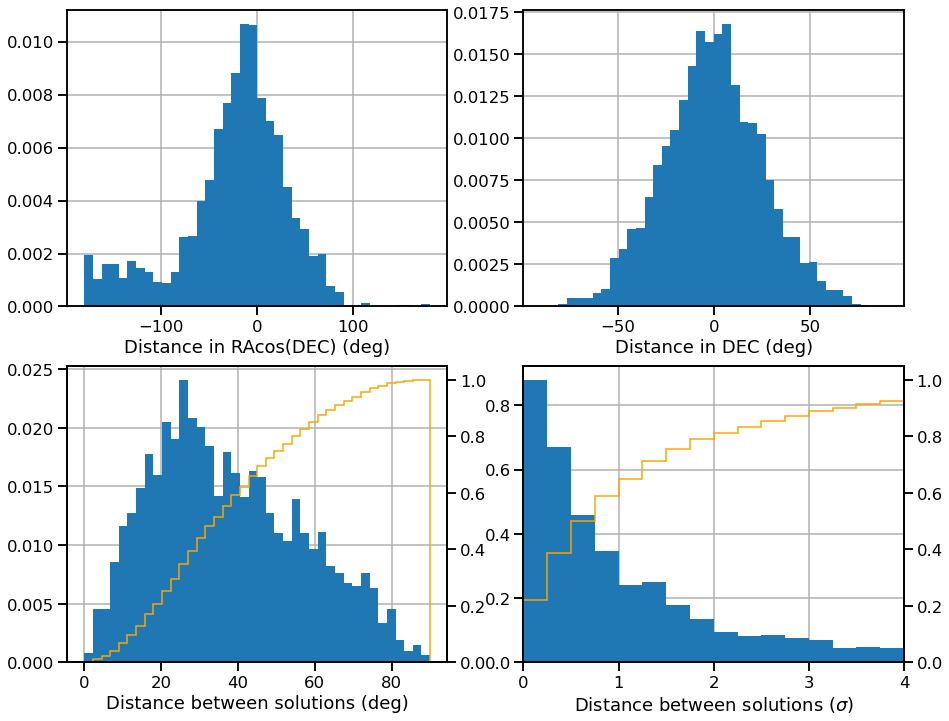

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))


cond = data['spins.closest']>=0
# cond *= data['flavor'] == 'bronze'
# cond *= data['flavor'] != 'toto'

print('Available spins: {:,}'.format(np.sum(cond)))

id_closest = data.loc[cond,'spins.closest'].astype('str')


nbins = 40
ax[0, 0].hist( data.loc[cond, 'spins.delta_RA'], range=[-180,180], bins=nbins, density=True )
ax[0, 1].hist( data.loc[cond, 'spins.delta_DEC'], range=[-90,90], bins=nbins, density=True )

ax[1, 0].hist( data.loc[cond, 'spins.distance'], range=[0,90], bins=nbins, density=True )
ax2 = ax[1, 0].twinx()
ax2.hist( data.loc[cond, 'spins.distance'], range=[0,90], bins=nbins, density=True , cumulative=True, histtype='step', color='orange')

ax[1, 1].hist( data.loc[cond, 'spins.distance']/data.dSpin, range=[0,10], bins=nbins, density=True )
ax3 = ax[1, 1].twinx()
ax3.hist( data.loc[cond, 'spins.distance']/data.dSpin, range=[0,10], bins=nbins, density=True, cumulative=True, histtype='step', color='orange' )
ax[1, 1].set_xlim(0,4)


ax[0, 0].set_xlabel('Distance in RAcos(DEC) (deg)')
ax[0, 1].set_xlabel('Distance in DEC (deg)')
ax[1, 0].set_xlabel('Distance between solutions (deg)')
ax[1, 1].set_xlabel('Distance between solutions ($\\sigma$)')



for a in ax:
    for a_ in a:
        a_.grid()
        a_.set_axisbelow(True)

fig.savefig('plots/fig_spins_validation.png', facecolor='white')
plt.show()

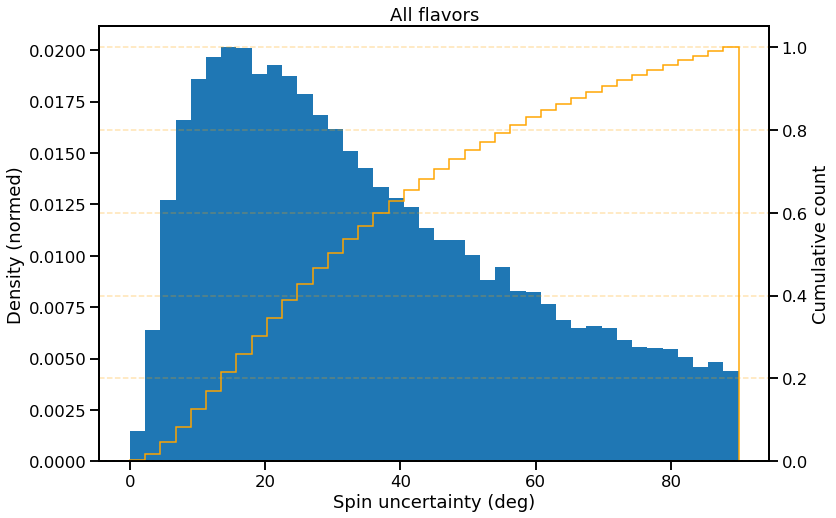

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.hist( data.dSpin, range=[0,90], bins=nbins, density=True,  )
ax0 = ax.twinx()

ax0.hist( data.dSpin, range=[0,90], bins=nbins, density=True, cumulative=True, histtype='step', color='orange' )

ax.set_xlabel('Spin uncertainty (deg)')
ax.set_ylabel('Density (normed)')
ax0.set_ylabel('Cumulative count')

ax0.grid(color='orange', alpha=0.3, ls='--')
ax.set_title('All flavors')
ax.set_axisbelow(True)
fig.savefig('plots/spin_uncertainty.png', facecolor='white', dpi=150)
plt.show()

### RA0

Number of observations for gold   :  1625/104005
Number of observations for silver : 19708/104005
Number of observations for bronze : 66066/104005


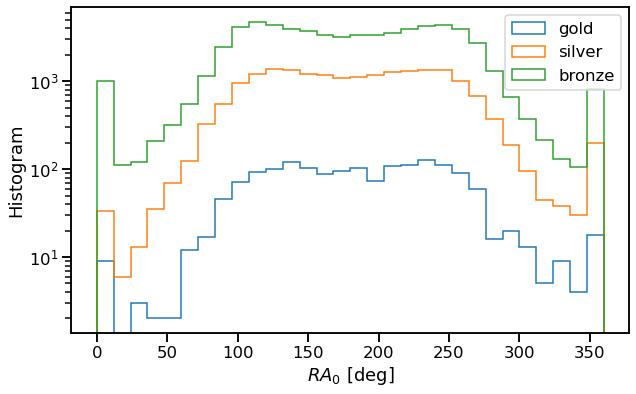

In [27]:
fig = plt.figure(figsize=(10, 6))
for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    print('Number of observations for {:7s}: {:5d}/{:5d}'.format(flavor, len(data[cond]), len(data)))
    plt.hist(
        data.loc[cond, 'RA0'], 
        bins=30,
        histtype='step', 
        label=flavor, 
        density=False
    )
    
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel(r'$RA_0$ [deg]')
plt.ylabel('Histogram')
plt.savefig('plots/ra0.png', dpi=150)
plt.show()

Number of observations for gold   :  1625/104005
Number of observations for silver : 19708/104005
Number of observations for bronze : 66066/104005


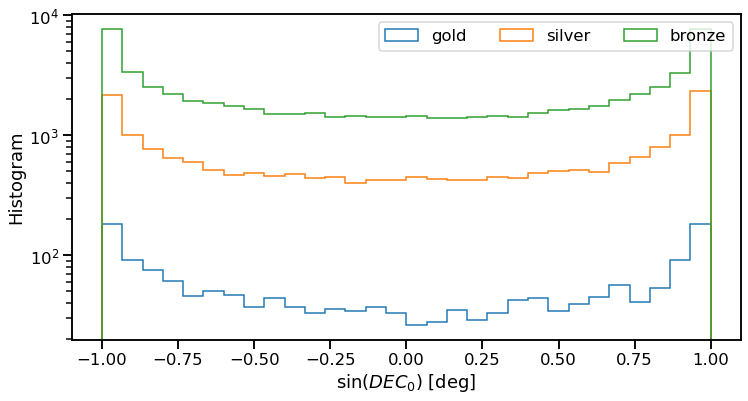

In [28]:
fig = plt.figure(figsize=(12, 6))
for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    print('Number of observations for {:7s}: {:5d}/{:5d}'.format(flavor, len(data[cond]), len(data)))
    plt.hist(
        np.sin(data.loc[cond, 'DEC0']), 
        bins=30,
        histtype='step', 
        label=flavor, 
        density=False
    )
    
plt.yscale('log')
plt.legend(loc='best', ncol=3)
plt.xlabel(r'$\sin(DEC_0)$ [deg]')
plt.ylabel('Histogram')
plt.savefig('plots/sindec0.png', dpi=150)
plt.show()

Number of observations for gold   :  1625/104005
Number of observations for silver : 19708/104005
Number of observations for bronze : 66066/104005


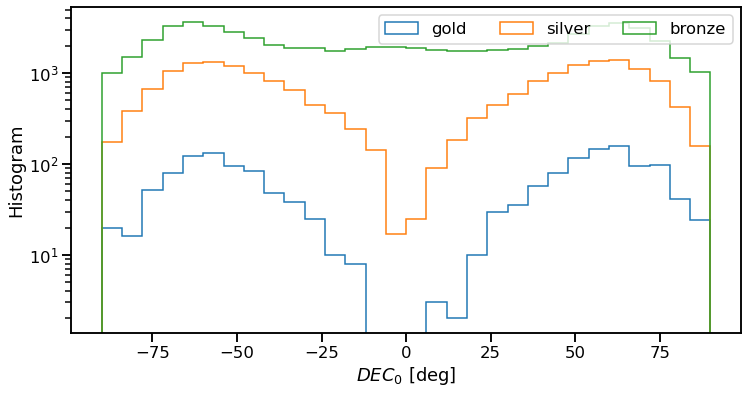

In [29]:
fig = plt.figure(figsize=(12, 6))
for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    print('Number of observations for {:7s}: {:5d}/{:5d}'.format(flavor, len(data[cond]), len(data)))
    plt.hist(
        data.loc[cond, 'DEC0'], 
        bins=30,
        histtype='step', 
        label=flavor, 
        density=False
    )
    
plt.yscale('log')
plt.legend(loc='best', ncol=3)
plt.xlabel(r'$DEC_0$ [deg]')
plt.ylabel('Histogram')
plt.savefig('plots/dec0.png', dpi=150)
plt.show()

Number of observations for gold   :  1625/104005
Number of observations for silver : 19708/104005
Number of observations for bronze : 24460/104005


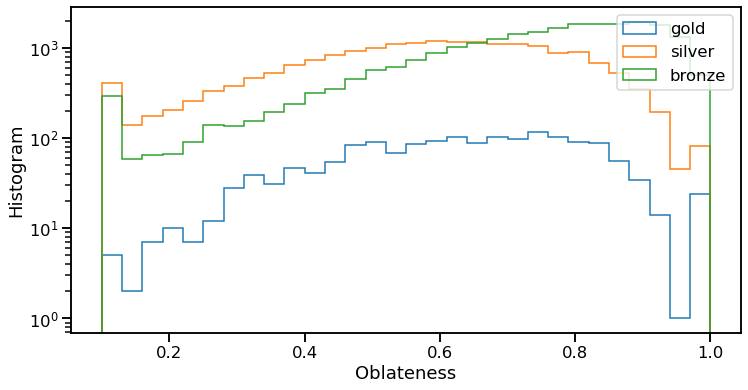

In [30]:
fig = plt.figure(figsize=(12, 6))
for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    cond *= data['R']/data['dR'] > 1
    print('Number of observations for {:7s}: {:5d}/{:5d}'.format(flavor, len(data[cond]), len(data)))
    plt.hist(
        data.loc[cond, 'R'], 
        bins=30,
        histtype='step', 
        label=flavor, 
        density=False
    )
    
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel(r'Oblateness')
plt.ylabel('Histogram')
plt.savefig('plots/R.png', dpi=150)
plt.show()

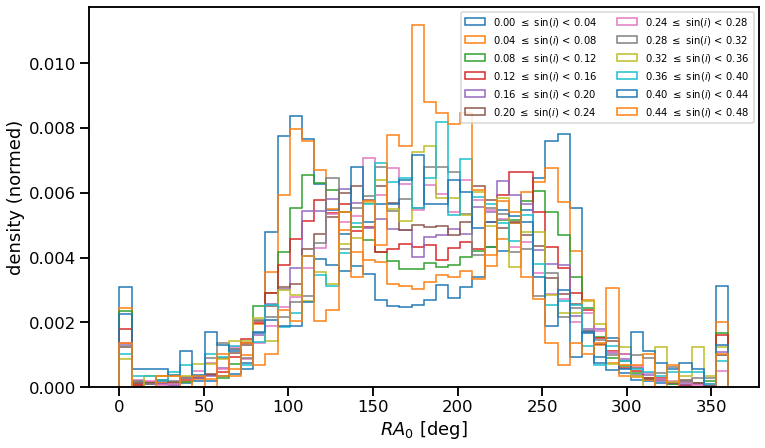

In [31]:
Is = np.sin(np.deg2rad(data['orbital_elements.inclination.value']))

fig = plt.figure(figsize=(12, 7))
m = data['flavor'] == 'bronze'

step = 0.04
for i in range(0, 12):

    mi = (Is[m] >= i*step) * (Is[m] < (i+1)*step)
    plt.hist(
        data['RA0'][m][mi], 
        bins=50, 
        density=True,
        histtype='step', 
        label=r'{:.2f} $\leq$ $\sin(i)$ < {:.2f}'.format(i*step, (i+1)*step)
    )
    
# plt.yscale('log')
plt.legend(ncol=2, fontsize=10)
plt.xlabel(r'$RA_0$ [deg]')
plt.ylabel('density (normed)')
fig.savefig('plots/ra0_vs_incl_distrib.png', facecolor='white', dpi=150)
plt.show()

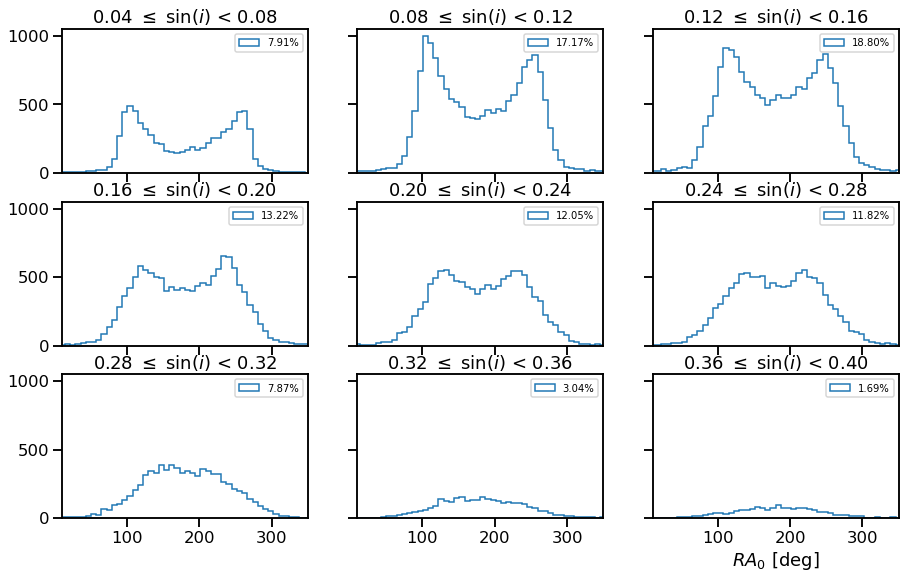

In [32]:
Is = np.sin(np.deg2rad(data['orbital_elements.inclination.value']))

fig, ax = plt.subplots(3, 3, figsize=(15, 9), sharex=True, sharey=True)
m1 = data['flavor'] == 'gold'
m = data['flavor'] != 'toto'

step = 0.04
count = 0
for i in range(0, 3):
    for j in range(0, 3):

        mi = (Is[m] >= count*step) * (Is[m] < (count+1)*step)
        ax[i, j].hist(
            data['RA0'][m][mi], 
            bins=50, 
            density=False,
            histtype='step', 
            label='{:.2f}%'.format(len(data['RA0'][m][mi])/len(data['RA0'][m]) * 100)
        )
#         mi1 = (Is[m1] >= count*step) * (Is[m1] < (count+1)*step)
#         ax[i, j].hist(
#             data['RA0'][m1][mi1], 
#             bins=50, 
#             density=False,
#             histtype='step',
#             label='silver'
#         )
        count += 1
        ax[i, j].set_title(r'{:.2f} $\leq$ $\sin(i)$ < {:.2f}'.format(count*step, (count+1)*step))
        ax[i, j].set_xlim(10, 350)

        # only on the last one
        ax[i, j].legend(fontsize=10)
plt.xlabel(r'$RA_0$ [deg]')
# plt.yscale('log')
fig.savefig('plots/ra0_vs_incl_distrib.png', facecolor='white', dpi=150)
plt.show()

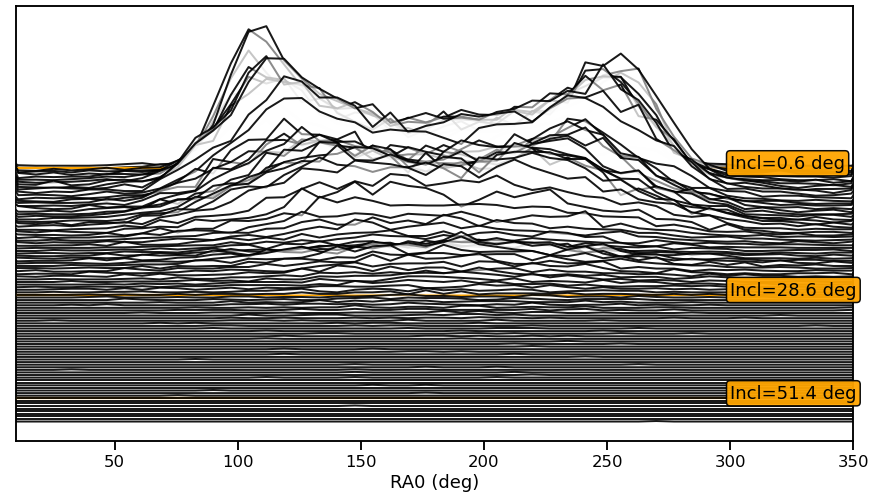

In [33]:
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

# cond = data['flavor'] == 'silver'
cond = data['RA0'] == data['RA0']

d_1 = data.loc[cond,'RA0']
Is = np.sin(np.deg2rad(data['orbital_elements.inclination.value']))
d_2 = Is[cond]

H, x, y = np.histogram2d(d_1, d_2, bins=(50, 100))

nx = len(H)
ny = len(H[0])
fig = plt.figure(figsize=(15, 8), facecolor='w')
ax = fig.add_subplot(111)
maxs = []
for iy in range(ny):
    # Offset each line by this amount: we want the first lines plotted
    # at the top of the chart and to work our way down
    offset = (ny-iy)*5
    # Plot the line and fill under it: increase the z-order each time
    # so that lower lines and their fills are plotted over higher ones
#     yhat = savgol_filter(H.T[iy], 7, 3)
    yhat = H.T[iy]
    xcenters = (x[:-1] + x[1:]) / 2
    ax.plot(xcenters, yhat+offset, 'k', lw=2, zorder=(iy+1)*2, alpha=0.9)
    ax.fill_between(xcenters, yhat+offset, offset, facecolor='w', lw=0, zorder=(iy+1)*2-1, alpha=0.5)
    if np.max(yhat) > 1.1 * np.mean(yhat):
        max_ = np.argmax(yhat)
        maxs.append([xcenters[max_], yhat[max_]])
ax.get_yaxis().set_visible(False)

for incl in [10, int(ny/2), ny-1]:
    ax.text(300, offset*incl, 'Incl={:.1f} deg'.format(np.rad2deg(y[::-1][:-1][incl])), color='black', 
        bbox=dict(facecolor='orange', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.95), zorder=1e6)
    plt.axhline(offset*incl, color='orange', zorder=5)
plt.xlim(10, 350)
plt.xlabel('RA0 (deg)')
fig.savefig('plots/ra0_vs_incl_waterfall.png', facecolor='white', dpi=150)
plt.show()

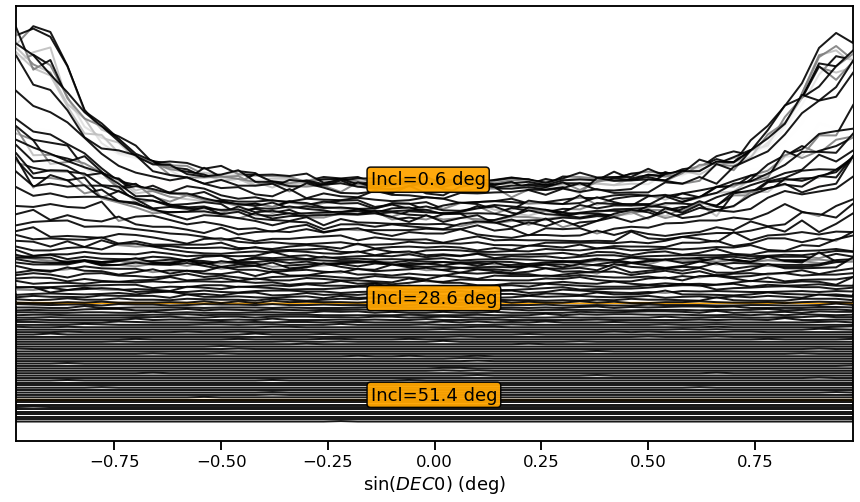

In [34]:
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

# cond = data['flavor'] == 'silver'
cond = data['RA0'] == data['RA0']

d_1 = np.sin(np.deg2rad(data.loc[cond,'DEC0']))
d_2 = Is[cond]

H, x, y = np.histogram2d(d_1, d_2, bins=(50, 100))

nx = len(H)
ny = len(H[0])
fig = plt.figure(figsize=(15, 8), facecolor='w')
ax = fig.add_subplot(111)
maxs = []
for iy in range(ny):
    # Offset each line by this amount: we want the first lines plotted
    # at the top of the chart and to work our way down
    offset = (ny-iy)*5
    # Plot the line and fill under it: increase the z-order each time
    # so that lower lines and their fills are plotted over higher ones
#     yhat = savgol_filter(H.T[iy], 7, 3)
    yhat = H.T[iy]
    xcenters = (x[:-1] + x[1:]) / 2
    ax.plot(xcenters, yhat+offset, 'k', lw=2, zorder=(iy+1)*2, alpha=0.9)
    ax.fill_between(xcenters, yhat+offset, offset, facecolor='w', lw=0, zorder=(iy+1)*2-1, alpha=0.5)
    if np.max(yhat) > 1.1 * np.mean(yhat):
        max_ = np.argmax(yhat)
        maxs.append([xcenters[max_], yhat[max_]])
ax.get_yaxis().set_visible(False)

for incl in [10, int(ny/2), ny-1]:
    ax.text(-0.15, offset*incl, 'Incl={:.1f} deg'.format(np.rad2deg(y[::-1][:-1][incl])), color='black', 
        bbox=dict(facecolor='orange', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.95), zorder=1e6)
    plt.axhline(offset*incl, color='orange', zorder=5)
plt.xlim(xcenters[0], xcenters[-1])
plt.xlabel('$\sin(DEC0)$ (deg)')
fig.savefig('plots/dec0_vs_incl_waterfall.png', facecolor='white', dpi=150)
plt.show()

In [35]:
m = data['flavor'] == 'gold'
cols = ['ssnamenr', 'nmeasurements', 'ndays', 'spins.distance', 'R', 'minphase', 'maxphase']
data[m][cols]

,ssnamenr,nmeasurements,ndays,spins.distance,R,minphase,maxphase
116,47586,107,943.118287,NaN,0.647746,4.469434,23.108029
278,90188,66,1073.791123,NaN,0.559080,0.745051,24.573740
310,84883,165,1089.557662,NaN,0.670407,1.473039,19.126627
333,82556,107,597.765475,NaN,0.464152,3.767823,24.329055
388,55469,82,1167.659630,NaN,0.351500,3.387031,26.775590
...,...,...,...,...,...,...,...
103497,32663,120,1091.919282,NaN,0.758698,0.211507,26.943816
103532,4435,211,602.066019,55.635003,0.578253,12.296686,32.346184
103616,67037,203,952.844271,NaN,0.662795,3.641109,17.779305
103842,97194,58,646.716956,NaN,1.000000,1.067336,23.749819


In [36]:
m = data['flavor'] == 'gold'
cols = ['ssnamenr', 'nmeasurements', 'ndays', 'spins.distance', 'R', 'minphase', 'maxphase', 'RA0', 'DEC0']
data[m][cols][data[m]['spins.distance'] > 0]

,ssnamenr,nmeasurements,ndays,spins.distance,R,minphase,maxphase,RA0,DEC0
18353,2754,154,983.076736,27.346156,0.884940,2.606039,31.618144,240.651962,58.306866
23897,79144,104,864.091991,58.627186,0.680968,9.368240,24.024915,244.716034,70.438013
103532,4435,211,602.066019,55.635003,0.578253,12.296686,32.346184,200.358449,-73.221841


## Chi2

In [37]:
data_hg1g2 = pd.read_parquet('data/sso_bft_50_inf_hg1g2.parquet')
data_hg12 = pd.read_parquet('data/sso_bft_50_inf_hg12.parquet')
data_hg = pd.read_parquet('data/sso_bft_50_inf_hg.parquet')

In [39]:
d1 = data[['ssnamenr', 'chi2red']]
names = ['_hg1g2', '_hg12', '_hg']
for suffix, d_ in zip(names, [data_hg1g2, data_hg12, data_hg]):
    d_['chi2red' + suffix] = d_['params'].apply(lambda x: x['chi2red'])
    cols = ['ssnamenr', 'chi2red' + suffix]
    d2 = d_[cols]
    d1 = d1.merge(d2, on='ssnamenr', suffixes=('', suffix))

In [40]:
d1

,ssnamenr,chi2red,chi2red_hg1g2,chi2red_hg12,chi2red_hg
0,3378,3.145355,3.143941,3.175101,3.220069
1,66214,2.204109,2.342782,2.561188,2.429158
2,30141,2.319000,2.744992,2.751800,2.762185
3,161891,1.320994,1.373678,1.453015,1.390457
4,85970,5.296944,5.381811,5.695245,5.588382
...,...,...,...,...,...
103949,64758,3.453423,3.321513,3.301555,3.366093
103950,76784,3.600424,3.868424,3.918697,3.845180
103951,181960,2.746991,3.165258,3.414373,3.276781
103952,366616,1.484595,1.496101,1.499804,1.504085


In [ ]:
# fig = plt.figure(figsize=(10, 10))

# plt.scatter(d1['chi2red_spins'], d1['chi2red_y'], marker='.', alpha=0.5)
# plt.plot(range(0, 14000), color='C3')
# plt.xlim(0, 40)
# plt.ylim(0, 40)
# plt.show()

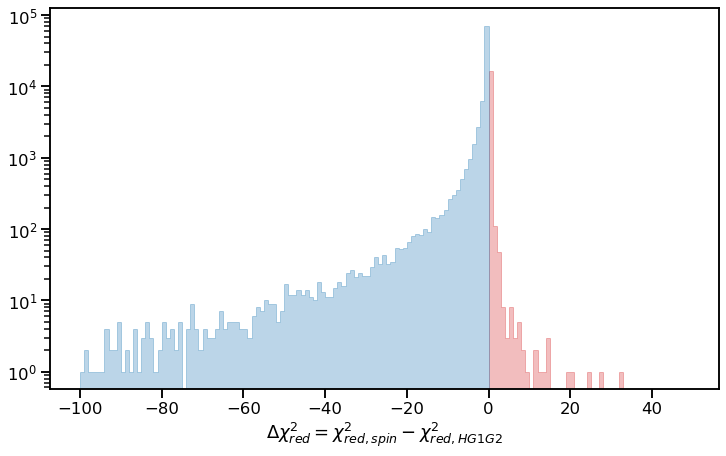

In [42]:
fig = plt.figure(figsize=(12, 7))

diff = d1['chi2red'] - d1['chi2red_hg1g2']
m = diff >= 0

bins = range(-100, 50, 1)
_, bins, _ = plt.hist((diff)[m], bins=bins, range=[-100, 50], color='C3', alpha=0.3, lw=1, edgecolor='C3', histtype='stepfilled');
plt.hist((diff)[~m], bins=bins, range=[-100, 50], color='C0', alpha=0.3, lw=1, edgecolor='C0', histtype='stepfilled');

plt.yscale('log')
plt.xlabel('$\Delta \chi^2_{red} = \chi^2_{red, spin} - \chi^2_{red, HG1G2}$')
fig.savefig('plots/dchi2.png', facecolor='white', dpi=150)
plt.show()

In [ ]:
# d1[d1['chi2red_x'] - d1['chi2red_y'] < -1000]